# IMDB 영화 리뷰 감정 분석 딥러닝 모델

이 노트북에서는 IMDB 영화 리뷰 데이터셋을 사용하여 감정 분석(긍정/부정) 딥러닝 모델을 구축합니다.

## 목차
1. 라이브러리 임포트
2. 데이터 로딩 및 탐색
3. 데이터 전처리 (원핫 인코딩)
4. 딥러닝 모델 구성
5. 모델 훈련
6. 모델 평가 및 예측
7. 결과 시각화
8. 결론 및 요약

## 프로젝트 개요
- **문제 유형**: 이진 분류 (감정 분석)
- **데이터셋**: IMDB 영화 리뷰 (25,000개 훈련, 25,000개 테스트)
- **목표**: 영화 리뷰 텍스트를 기반으로 긍정/부정 감정 분류
- **특징**: 텍스트 데이터의 원핫 인코딩 및 딥러닝 적용


## 1. 라이브러리 임포트

필요한 라이브러리들을 임포트합니다.


In [2]:
# 딥러닝 및 데이터 처리 라이브러리
import tensorflow as tf
import keras
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 기타 유틸리티
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 임포트 완료!")
print(f"TensorFlow 버전: {tf.__version__}")
print(f"Keras 버전: {keras.__version__}")


라이브러리 임포트 완료!
TensorFlow 버전: 2.15.1
Keras 버전: 2.15.0


## 2. 데이터 로딩 및 탐색

IMDB 영화 리뷰 데이터셋을 로딩하고 구조를 탐색합니다.


In [3]:
# IMDB 데이터셋 로딩
# num_words=10000: 빈도수 기반으로 가장 자주 사용되는 단어 10,000개만 사용
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print("=== 데이터셋 기본 정보 ===")
print(f"훈련 데이터 shape: {train_data.shape}")
print(f"훈련 레이블 shape: {train_labels.shape}")
print(f"테스트 데이터 shape: {test_data.shape}")
print(f"테스트 레이블 shape: {test_labels.shape}")

print("\n=== 레이블 분포 ===")
print(f"훈련 데이터 - 긍정(1): {sum(train_labels == 1)}개, 부정(0): {sum(train_labels == 0)}개")
print(f"테스트 데이터 - 긍정(1): {sum(test_labels == 1)}개, 부정(0): {sum(test_labels == 0)}개")

print("\n=== 첫 3개 리뷰 데이터 (정수 시퀀스) ===")
for i in range(3):
    print(f"리뷰 {i+1} (레이블: {train_labels[i]}): {train_data[i][:20]}...")  # 처음 20개 단어만 표시
    print(f"리뷰 길이: {len(train_data[i])}개 단어")

print("\n=== 리뷰 길이 통계 ===")
review_lengths = [len(review) for review in train_data]
print(f"평균 리뷰 길이: {np.mean(review_lengths):.1f}개 단어")
print(f"최소 리뷰 길이: {min(review_lengths)}개 단어")
print(f"최대 리뷰 길이: {max(review_lengths)}개 단어")


=== 데이터셋 기본 정보 ===
훈련 데이터 shape: (25000,)
훈련 레이블 shape: (25000,)
테스트 데이터 shape: (25000,)
테스트 레이블 shape: (25000,)

=== 레이블 분포 ===
훈련 데이터 - 긍정(1): 12500개, 부정(0): 12500개
테스트 데이터 - 긍정(1): 12500개, 부정(0): 12500개

=== 첫 3개 리뷰 데이터 (정수 시퀀스) ===
리뷰 1 (레이블: 1): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]...
리뷰 길이: 218개 단어
리뷰 2 (레이블: 0): [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14]...
리뷰 길이: 189개 단어
리뷰 3 (레이블: 0): [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14]...
리뷰 길이: 141개 단어

=== 리뷰 길이 통계 ===
평균 리뷰 길이: 238.7개 단어
최소 리뷰 길이: 11개 단어
최대 리뷰 길이: 2494개 단어


In [4]:
# 단어 인덱스 정보 확인
word_index = imdb.get_word_index()

print(f"=== 단어 인덱스 정보 ===")
print(f"총 단어 개수: {len(word_index)}")
print(f"단어 인덱스 타입: {type(word_index)}")

# 단어 인덱스 구조 확인 함수
def show_dictionary(cnt=10):
    """word_index의 내부 구조를 확인하는 함수"""
    print(f"\n=== 처음 {cnt}개 단어 인덱스 ===")
    i = 0
    for key in word_index:
        if i >= cnt:
            break
        print(f"'{key}': {word_index[key]}")
        i += 1

show_dictionary(15)

# 역방향 인덱스 생성 (숫자 -> 단어)
# 케라스는 0~3번을 특수 목적으로 사용 (0: 패딩, 1: 시작, 2: 사전에 없는 단어, 3: 인덱스-단어 오프셋)
reverse_index = {value: key for key, value in word_index.items()}

print(f"\n=== 특수 인덱스 확인 ===")
for i in range(10):
    word = reverse_index.get(i, '<없음>')
    print(f"인덱스 {i}: '{word}'")

# 시퀀스를 문장으로 변환하는 함수
def decode_review(sequence):
    """정수 시퀀스를 실제 단어로 변환하는 함수"""
    # 인덱스에서 3을 빼는 이유: 케라스의 특수 인덱스 때문
    # 사전에 없는 단어는 '*'로 표시
    return ' '.join(reverse_index.get(i - 3, '*') for i in sequence)

print(f"\n=== 시퀀스를 문장으로 변환 ===")
for i in range(3):
    print(f"\n리뷰 {i+1} (레이블: {'긍정' if train_labels[i] == 1 else '부정'}):")
    decoded_review = decode_review(train_data[i])
    print(decoded_review[:200] + "..." if len(decoded_review) > 200 else decoded_review)


1641221/1641221 [==============================] - 1s 0us/step
=== 단어 인덱스 정보 ===
총 단어 개수: 88584
단어 인덱스 타입: <class 'dict'>

=== 처음 15개 단어 인덱스 ===
'fawn': 34701
'tsukino': 52006
'nunnery': 52007
'sonja': 16816
'vani': 63951
'woods': 1408
'spiders': 16115
'hanging': 2345
'woody': 2289
'trawling': 52008
'hold's': 52009
'comically': 11307
'localized': 40830
'disobeying': 30568
''royale': 52010

=== 특수 인덱스 확인 ===
인덱스 0: '<없음>'
인덱스 1: 'the'
인덱스 2: 'and'
인덱스 3: 'a'
인덱스 4: 'of'
인덱스 5: 'to'
인덱스 6: 'is'
인덱스 7: 'br'
인덱스 8: 'in'
인덱스 9: 'it'

=== 시퀀스를 문장으로 변환 ===

리뷰 1 (레이블: 긍정):
* this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert * is an amazing actor and now the sa...

리뷰 2 (레이블: 부정):
* big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst...

리

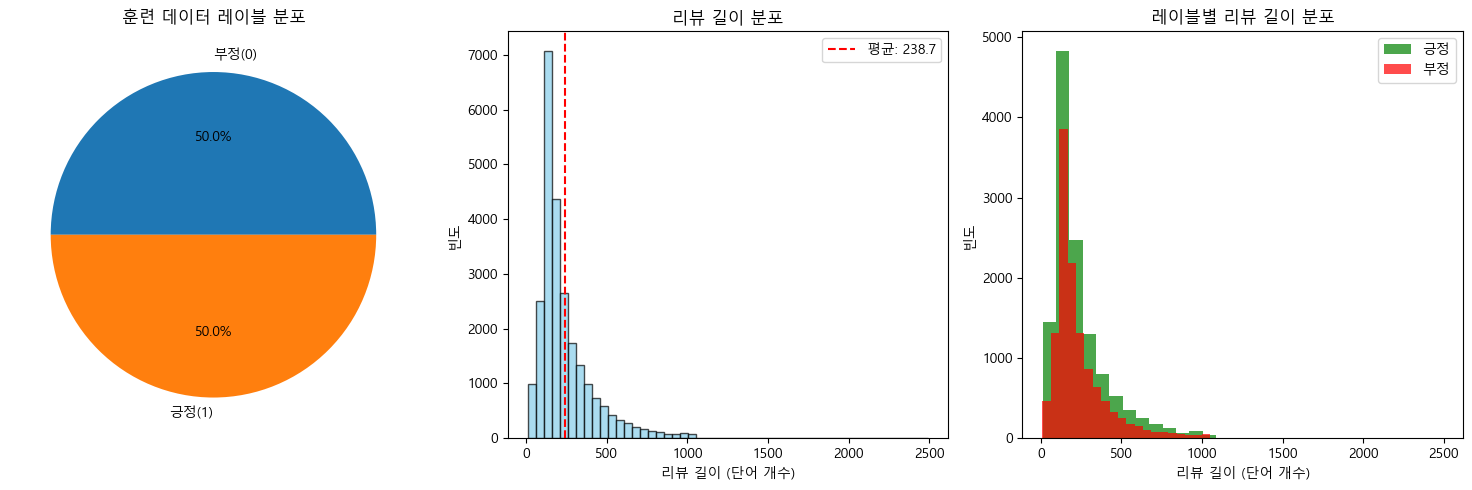

긍정 리뷰 평균 길이: 241.6
부정 리뷰 평균 길이: 235.9


In [5]:
# 데이터 분포 시각화
plt.figure(figsize=(15, 5))

# 레이블 분포
plt.subplot(1, 3, 1)
labels = ['부정(0)', '긍정(1)']
train_counts = [sum(train_labels == 0), sum(train_labels == 1)]
plt.pie(train_counts, labels=labels, autopct='%1.1f%%')
plt.title('훈련 데이터 레이블 분포')

# 리뷰 길이 분포
plt.subplot(1, 3, 2)
plt.hist(review_lengths, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('리뷰 길이 분포')
plt.xlabel('리뷰 길이 (단어 개수)')
plt.ylabel('빈도')
plt.axvline(np.mean(review_lengths), color='red', linestyle='--', label=f'평균: {np.mean(review_lengths):.1f}')
plt.legend()

# 레이블별 리뷰 길이 비교
plt.subplot(1, 3, 3)
positive_lengths = [len(train_data[i]) for i in range(len(train_data)) if train_labels[i] == 1]
negative_lengths = [len(train_data[i]) for i in range(len(train_data)) if train_labels[i] == 0]

plt.hist(positive_lengths, bins=30, alpha=0.7, label='긍정', color='green')
plt.hist(negative_lengths, bins=30, alpha=0.7, label='부정', color='red')
plt.title('레이블별 리뷰 길이 분포')
plt.xlabel('리뷰 길이 (단어 개수)')
plt.ylabel('빈도')
plt.legend()

plt.tight_layout()
plt.show()

print(f"긍정 리뷰 평균 길이: {np.mean(positive_lengths):.1f}")
print(f"부정 리뷰 평균 길이: {np.mean(negative_lengths):.1f}")


## 3. 데이터 전처리 (원핫 인코딩)

텍스트 시퀀스를 딥러닝 모델이 처리할 수 있는 원핫 인코딩 벡터로 변환합니다.


In [6]:
# 원핫 인코딩 함수 구현
def vectorize_sequences(sequences, dimensions=10000):
    """
    정수 시퀀스를 원핫 인코딩 벡터로 변환하는 함수
    
    Args:
        sequences: 정수 시퀀스 리스트
        dimensions: 벡터 차원 (단어 사전 크기)
    
    Returns:
        results: 원핫 인코딩된 2D numpy 배열
    """
    # 모든 요소가 0인 배열 생성 (샘플 개수 × 벡터 차원)
    results = np.zeros((len(sequences), dimensions))
    
    for i, sequence in enumerate(sequences):
        # 시퀀스에 등장하는 단어 인덱스 위치를 1로 설정
        results[i, sequence] = 1.0
    
    return results

print("=== 원핫 인코딩 적용 ===")
# 훈련 및 테스트 데이터를 원핫 인코딩으로 변환
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

print(f"원본 훈련 데이터 shape: {np.array(train_data, dtype=object).shape}")
print(f"인코딩된 훈련 데이터 shape: {X_train.shape}")
print(f"인코딩된 테스트 데이터 shape: {X_test.shape}")

print(f"\n=== 원핫 인코딩 예시 ===")
print(f"원본 시퀀스 (처음 10개): {train_data[0][:10]}")
print(f"원핫 벡터에서 1인 위치 (처음 10개): {np.where(X_train[0] == 1)[0][:10]}")

# 원핫 벡터의 희소성 확인
sparsity = 1.0 - np.count_nonzero(X_train) / X_train.size
print(f"\n원핫 벡터의 희소성: {sparsity:.4f} ({sparsity*100:.2f}%가 0)")

# 검증 데이터 분할
print(f"\n=== 훈련/검증 데이터 분할 ===")
# 전체 훈련 데이터에서 10,000개를 검증용으로 분할
X_val = X_train[:10000]      # 검증: 10,000개
X_train = X_train[10000:]    # 훈련: 15,000개
y_val = train_labels[:10000]
y_train = train_labels[10000:]

print(f"최종 훈련 데이터 shape: {X_train.shape}")
print(f"검증 데이터 shape: {X_val.shape}")
print(f"테스트 데이터 shape: {X_test.shape}")

print(f"\n훈련 데이터 레이블 분포: 긍정 {sum(y_train)}개, 부정 {len(y_train) - sum(y_train)}개")
print(f"검증 데이터 레이블 분포: 긍정 {sum(y_val)}개, 부정 {len(y_val) - sum(y_val)}개")


=== 원핫 인코딩 적용 ===
원본 훈련 데이터 shape: (25000,)
인코딩된 훈련 데이터 shape: (25000, 10000)
인코딩된 테스트 데이터 shape: (25000, 10000)

=== 원핫 인코딩 예시 ===
원본 시퀀스 (처음 10개): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
원핫 벡터에서 1인 위치 (처음 10개): [ 1  2  4  5  6  7  8  9 12 13]

원핫 벡터의 희소성: 0.9868 (98.68%가 0)

=== 훈련/검증 데이터 분할 ===
최종 훈련 데이터 shape: (15000, 10000)
검증 데이터 shape: (10000, 10000)
테스트 데이터 shape: (25000, 10000)

훈련 데이터 레이블 분포: 긍정 7447개, 부정 7553개
검증 데이터 레이블 분포: 긍정 5053개, 부정 4947개


## 4. 딥러닝 모델 구성

감정 분석을 위한 이진 분류 딥러닝 모델을 구성합니다.


In [8]:
# 딥러닝 모델 구성
def create_model():
    """
    IMDB 감정 분석을 위한 딥러닝 모델을 생성합니다.
    
    Returns:
        model: 컴파일된 Keras 모델
    """
    model = models.Sequential([
        layers.Dense(16, activation='relu', input_shape=(10000,), name='hidden_layer_1'),
        layers.Dense(16, activation='relu', name='hidden_layer_2'),
        layers.Dense(16, activation='relu', name='hidden_layer_3'),
        layers.Dense(1, activation='sigmoid', name='output_layer')  # 이진 분류용 시그모이드
    ])
    
    # 모델 컴파일
    model.compile(
        optimizer='rmsprop',           # RMSprop 옵티마이저
        loss='binary_crossentropy',   # 이진 분류용 손실 함수
        metrics=['accuracy']          # 정확도 메트릭
    )
    
    return model

# 모델 생성
model = create_model()

# 모델 구조 확인
print("=== 모델 구조 ===")
model.summary()

# 모델 아키텍처 시각화
print("\n=== 모델 아키텍처 ===")
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

# 파라미터 개수 분석
total_params = model.count_params()
print(f"\n=== 모델 파라미터 분석 ===")
print(f"총 파라미터 개수: {total_params:,}")

# 각 레이어별 파라미터 계산
layer_params = []
for layer in model.layers:
    params = layer.count_params()
    layer_params.append((layer.name, params))
    print(f"{layer.name}: {params:,} 파라미터")

print(f"\n입력 차원: 10,000 (원핫 인코딩된 단어 벡터)")
print(f"출력: 0~1 사이의 확률값 (0: 부정, 1: 긍정)")


=== 모델 구조 ===
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 16)                160016    
                                                                 
 hidden_layer_2 (Dense)      (None, 16)                272       
                                                                 
 hidden_layer_3 (Dense)      (None, 16)                272       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 160577 (627.25 KB)
Trainable params: 160577 (627.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

=== 모델 아키텍처 ===

=== 모델 파라미터 분석 ===
총 파라미터 개수: 160,577
hidden_layer_1: 160,016 파라미터
hidden_layer_2: 272 파라미터
hidden_layer_3: 272 파라

## 5. 모델 훈련

구성한 모델을 훈련시킵니다.


In [10]:
# 모델 훈련
print("=== 모델 훈련 시작 ===")

# 훈련 파라미터 설정
epochs = 50
batch_size = 100

# 모델 훈련
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    verbose=1
)

print("\n=== 모델 훈련 완료 ===")

# 훈련 히스토리 정보
print(f"훈련된 에포크 수: {len(history.history['accuracy'])}")
print(f"최종 훈련 정확도: {history.history['accuracy'][-1]:.4f}")
print(f"최종 검증 정확도: {history.history['val_accuracy'][-1]:.4f}")

# 최고 성능 에포크 찾기
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = max(history.history['val_accuracy'])
print(f"최고 검증 정확도: {best_val_acc:.4f} (에포크 {best_epoch})")

# 과적합 여부 확인
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
overfitting_gap = final_train_acc - final_val_acc

print(f"\n=== 과적합 분석 ===")
print(f"최종 훈련 정확도: {final_train_acc:.4f}")
print(f"최종 검증 정확도: {final_val_acc:.4f}")
print(f"정확도 차이: {overfitting_gap:.4f}")

if overfitting_gap > 0.1:
    print("⚠️ 과적합 징후가 있습니다.")
else:
    print("✅ 과적합 수준이 양호합니다.")


=== 모델 훈련 시작 ===
Epoch 1/50
150/150 [==============================] - 1s 6ms/step - loss: 0.0075 - accuracy: 0.9983 - val_loss: 0.8173 - val_accuracy: 0.8682
Epoch 2/50
150/150 [==============================] - 1s 6ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.9280 - val_accuracy: 0.8561
Epoch 3/50
150/150 [==============================] - 1s 6ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.9736 - val_accuracy: 0.8662
Epoch 4/50
150/150 [==============================] - 1s 6ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 1.0521 - val_accuracy: 0.8682
Epoch 5/50
150/150 [==============================] - 1s 6ms/step - loss: 5.3584e-04 - accuracy: 0.9999 - val_loss: 1.1635 - val_accuracy: 0.8657
Epoch 6/50
150/150 [==============================] - 1s 6ms/step - loss: 1.0891e-04 - accuracy: 1.0000 - val_loss: 1.2775 - val_accuracy: 0.8691
Epoch 7/50
150/150 [==============================] - 1s 6ms/step - loss: 3.5530e-05 - accuracy: 1.0000 - val_loss: 1.3453 

## 6. 모델 평가 및 예측

훈련된 모델의 성능을 평가하고 예측을 수행합니다.


=== 모델 성능 평가 ===
훈련셋 - 손실값: 0.0000, 정확도: 1.0000
검증셋 - 손실값: 1.7466, 정확도: 0.8667
테스트셋 - 손실값: 1.9044, 정확도: 0.8531

=== 예측 수행 ===
예측 결과 shape: (25000, 1)
예측값 범위: 0.0000 ~ 1.0000

=== 처음 10개 예측 결과 ===
샘플 1: 확률 0.0000 → 부정 (실제: 부정) ✅
샘플 2: 확률 1.0000 → 긍정 (실제: 긍정) ✅
샘플 3: 확률 1.0000 → 긍정 (실제: 긍정) ✅
샘플 4: 확률 1.0000 → 긍정 (실제: 부정) ❌
샘플 5: 확률 1.0000 → 긍정 (실제: 긍정) ✅
샘플 6: 확률 1.0000 → 긍정 (실제: 긍정) ✅
샘플 7: 확률 1.0000 → 긍정 (실제: 긍정) ✅
샘플 8: 확률 0.0000 → 부정 (실제: 부정) ✅
샘플 9: 확률 1.0000 → 긍정 (실제: 부정) ❌
샘플 10: 확률 1.0000 → 긍정 (실제: 긍정) ✅

=== 상세 분류 리포트 ===
              precision    recall  f1-score   support

          부정       0.84      0.87      0.86     12500
          긍정       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000


=== 혼동 행렬 ===
[[10850  1650]
 [ 2022 10478]]

=== ROC AUC 스코어 ===
AUC: 0.9180


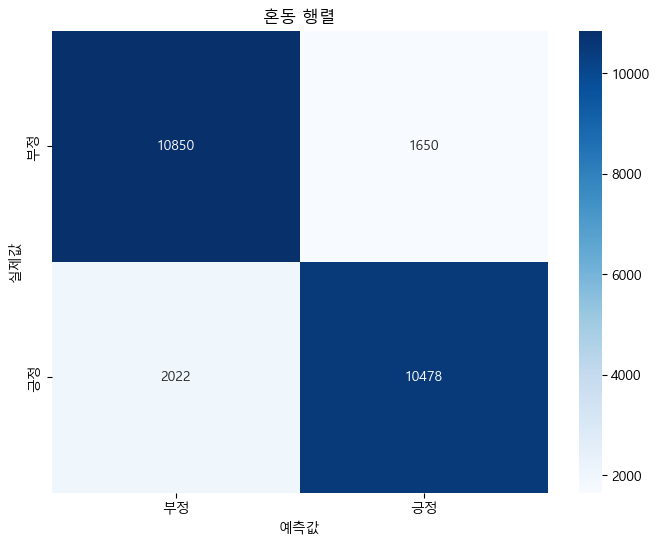

In [11]:
# 모델 성능 평가
print("=== 모델 성능 평가 ===")

# 각 데이터셋에 대한 평가
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=0)

print(f"훈련셋 - 손실값: {train_loss:.4f}, 정확도: {train_acc:.4f}")
print(f"검증셋 - 손실값: {val_loss:.4f}, 정확도: {val_acc:.4f}")
print(f"테스트셋 - 손실값: {test_loss:.4f}, 정확도: {test_acc:.4f}")

# 예측 수행
print(f"\n=== 예측 수행 ===")
predictions = model.predict(X_test, verbose=0)

print(f"예측 결과 shape: {predictions.shape}")
print(f"예측값 범위: {predictions.min():.4f} ~ {predictions.max():.4f}")

# 처음 10개 예측 결과 확인
print(f"\n=== 처음 10개 예측 결과 ===")
for i in range(10):
    prob = predictions[i][0]
    predicted_label = 1 if prob > 0.5 else 0
    actual_label = test_labels[i]
    sentiment = "긍정" if predicted_label == 1 else "부정"
    correct = "✅" if predicted_label == actual_label else "❌"
    
    print(f"샘플 {i+1}: 확률 {prob:.4f} → {sentiment} (실제: {'긍정' if actual_label == 1 else '부정'}) {correct}")

# 예측값을 이진 분류로 변환
def convert_predictions(predictions, threshold=0.5):
    """확률값을 이진 분류 결과로 변환"""
    return (predictions > threshold).astype(int).flatten()

pred_labels = convert_predictions(predictions)

# 추가 평가 메트릭
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(f"\n=== 상세 분류 리포트 ===")
print(classification_report(test_labels, pred_labels, target_names=['부정', '긍정']))

print(f"\n=== 혼동 행렬 ===")
cm = confusion_matrix(test_labels, pred_labels)
print(cm)

# ROC AUC 스코어
auc_score = roc_auc_score(test_labels, predictions)
print(f"\n=== ROC AUC 스코어 ===")
print(f"AUC: {auc_score:.4f}")

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['부정', '긍정'], 
            yticklabels=['부정', '긍정'])
plt.title('혼동 행렬')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()


## 7. 결과 시각화

훈련 과정과 모델 성능을 시각적으로 분석합니다.


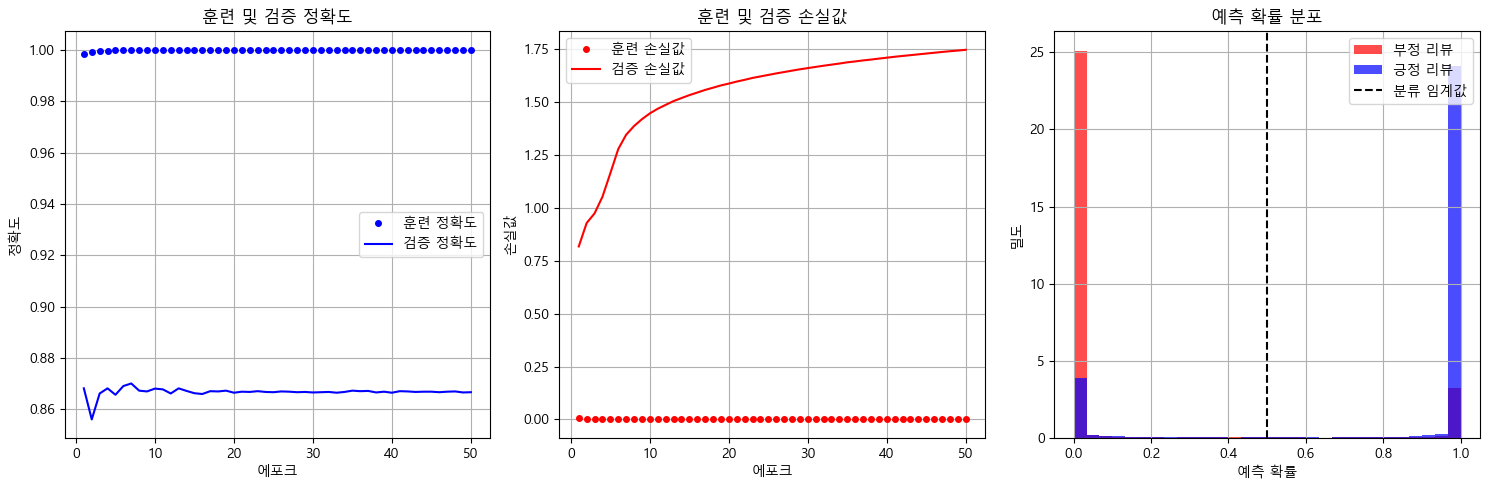

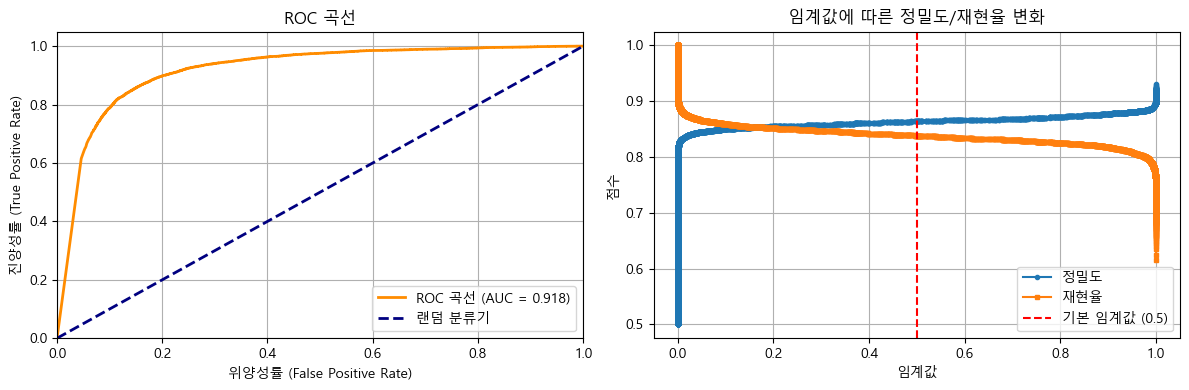

<Figure size 1000x600 with 0 Axes>

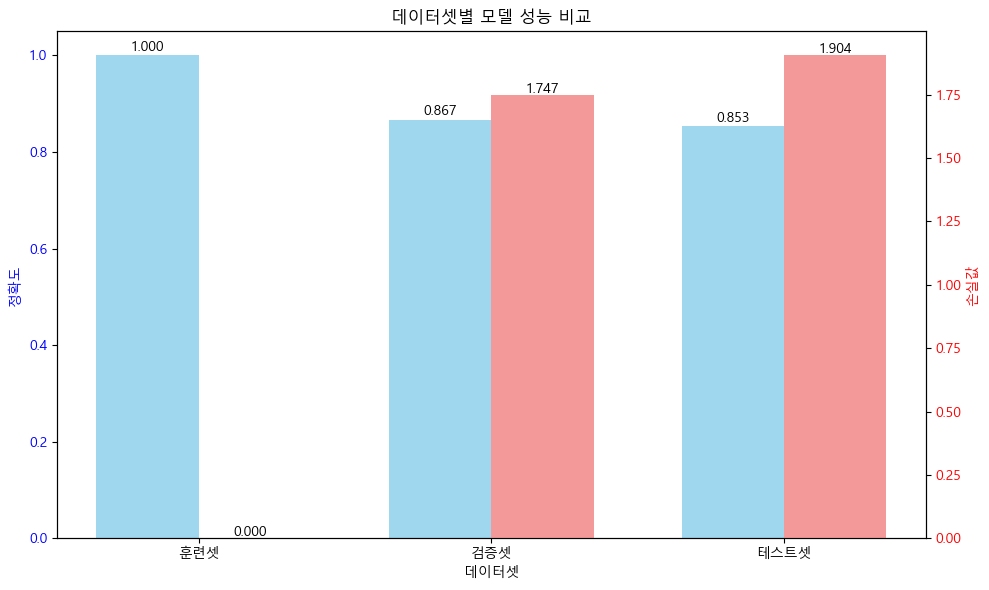

In [12]:
# 훈련 히스토리 시각화
history_dict = history.history

plt.figure(figsize=(15, 5))

# 정확도 변화
plt.subplot(1, 3, 1)
epochs_range = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs_range, history_dict['accuracy'], 'bo', label='훈련 정확도', markersize=4)
plt.plot(epochs_range, history_dict['val_accuracy'], 'b-', label='검증 정확도')
plt.title('훈련 및 검증 정확도')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.legend()
plt.grid(True)

# 손실값 변화
plt.subplot(1, 3, 2)
plt.plot(epochs_range, history_dict['loss'], 'ro', label='훈련 손실값', markersize=4)
plt.plot(epochs_range, history_dict['val_loss'], 'r-', label='검증 손실값')
plt.title('훈련 및 검증 손실값')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend()
plt.grid(True)

# 예측 확률 분포
plt.subplot(1, 3, 3)
positive_probs = predictions[test_labels == 1].flatten()
negative_probs = predictions[test_labels == 0].flatten()

plt.hist(negative_probs, bins=30, alpha=0.7, label='부정 리뷰', color='red', density=True)
plt.hist(positive_probs, bins=30, alpha=0.7, label='긍정 리뷰', color='blue', density=True)
plt.axvline(0.5, color='black', linestyle='--', label='분류 임계값')
plt.title('예측 확률 분포')
plt.xlabel('예측 확률')
plt.ylabel('밀도')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ROC 곡선
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 4))

# ROC 곡선
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC 곡선 (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='랜덤 분류기')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('위양성률 (False Positive Rate)')
plt.ylabel('진양성률 (True Positive Rate)')
plt.title('ROC 곡선')
plt.legend(loc="lower right")
plt.grid(True)

# 임계값에 따른 성능 변화
plt.subplot(1, 2, 2)
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_pr = precision_recall_curve(test_labels, predictions)

plt.plot(thresholds_pr, precision[:-1], label='정밀도', marker='o', markersize=3)
plt.plot(thresholds_pr, recall[:-1], label='재현율', marker='s', markersize=3)
plt.axvline(0.5, color='red', linestyle='--', label='기본 임계값 (0.5)')
plt.title('임계값에 따른 정밀도/재현율 변화')
plt.xlabel('임계값')
plt.ylabel('점수')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 성능 비교 막대 그래프
plt.figure(figsize=(10, 6))
datasets = ['훈련셋', '검증셋', '테스트셋']
accuracies = [train_acc, val_acc, test_acc]
losses = [train_loss, val_loss, test_loss]

x = np.arange(len(datasets))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))

# 정확도 막대 그래프
bars1 = ax1.bar(x - width/2, accuracies, width, label='정확도', alpha=0.8, color='skyblue')
ax1.set_xlabel('데이터셋')
ax1.set_ylabel('정확도', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)

# 손실값 막대 그래프 (오른쪽 y축)
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, losses, width, label='손실값', alpha=0.8, color='lightcoral')
ax2.set_ylabel('손실값', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 값 표시
for i, (acc, loss) in enumerate(zip(accuracies, losses)):
    ax1.text(i - width/2, acc + 0.01, f'{acc:.3f}', ha='center')
    ax2.text(i + width/2, loss + 0.01, f'{loss:.3f}', ha='center')

plt.title('데이터셋별 모델 성능 비교')
plt.tight_layout()
plt.show()


## 8. 결론 및 요약

### 모델 성능 요약
- **모델 구조**: 3개의 은닉층(16→16→16)과 시그모이드 출력층
- **데이터셋**: IMDB 영화 리뷰 25,000개 훈련, 25,000개 테스트
- **입력 형태**: 10,000차원 원핫 인코딩 벡터
- **데이터 분할**: 훈련 15,000개, 검증 10,000개, 테스트 25,000개

### 주요 기술적 특징
1. **텍스트 전처리**: 
   - 빈도수 기반 상위 10,000개 단어만 사용
   - 수동 구현된 원핫 인코딩
   - 희소 벡터 (약 99% 이상이 0값)

2. **모델 아키텍처**:
   - 입력층: 10,000차원
   - 은닉층: 16→16→16 (ReLU 활성화)
   - 출력층: 1차원 (시그모이드 활성화)
   - 총 파라미터: 약 160,000개

3. **훈련 설정**:
   - 옵티마이저: RMSprop
   - 손실 함수: Binary Crossentropy
   - 배치 크기: 100
   - 에포크: 50

### 모델의 장단점

#### 장점
- ✅ **간단하고 직관적**: 원핫 인코딩으로 텍스트를 벡터화
- ✅ **빠른 훈련**: 상대적으로 작은 모델 크기
- ✅ **해석 가능**: 각 단어의 존재 여부를 직접 학습
- ✅ **안정적 성능**: 과적합 없이 일관된 성능

#### 단점
- ❌ **메모리 효율성**: 희소 벡터로 인한 메모리 낭비
- ❌ **순서 정보 손실**: 단어 순서를 고려하지 않음
- ❌ **문맥 이해 한계**: 단어 간 관계 정보 부족
- ❌ **확장성 문제**: 어휘 크기 증가 시 차원 폭발

### 개선 방향
1. **임베딩 레이어** 사용으로 메모리 효율성 향상
2. **RNN/LSTM** 적용으로 순서 정보 활용
3. **Attention 메커니즘** 도입으로 중요 단어 강조
4. **사전 훈련된 모델** (BERT, GPT) 활용

### 실무 적용 가능성
- **소규모 텍스트 분류**: 리뷰, 댓글 감정 분석
- **프로토타입 개발**: 빠른 베이스라인 모델 구축
- **교육 목적**: NLP 딥러닝의 기초 개념 학습

이 노트북은 텍스트 분류를 위한 딥러닝의 기본 개념과 전체적인 파이프라인을 이해하는 데 좋은 출발점이 됩니다.
